In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [1]:
from google.colab import files
uploaded = files.upload()

Saving stock_data.csv to stock_data.csv


In [2]:
!pip install pandas numpy matplotlib scikit-learn tensorflow


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


249/249 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - loss: 0.1019 - val_loss: 0.0768
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 0.0822 - val_loss: 0.0773
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.0811 - val_loss: 0.0768
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.0810 - val_loss: 0.0767
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - loss: 0.0809 - val_loss: 0.0765
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 0.0796 - val_loss: 0.0764
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 0.0810 - val_loss: 0.0763
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - loss: 0.0806 - val_loss: 0.0764
Epoch 9/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - loss: 0.0808 - val_loss: 0.0778
Epoch 10/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - loss: 0.0808 - val_loss: 0.0778
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


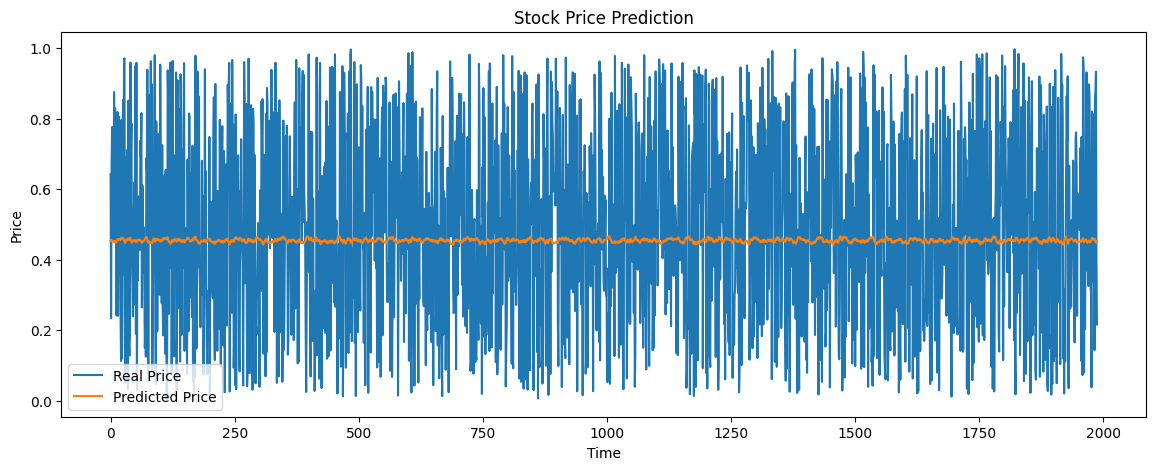

In [6]:
import numpy as np
import pandas as pd
df= pd.read_csv('stock_data.csv')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and scale the data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split into train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict and plot
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test)

plt.figure(figsize=(14,5))
plt.plot(real_prices, label='Real Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [7]:
!pip install tensorflow scikit-learn matplotlib


In [8]:
from google.colab import files
uploaded = files.upload()


Saving stock_data.csv to stock_data (1).csv


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


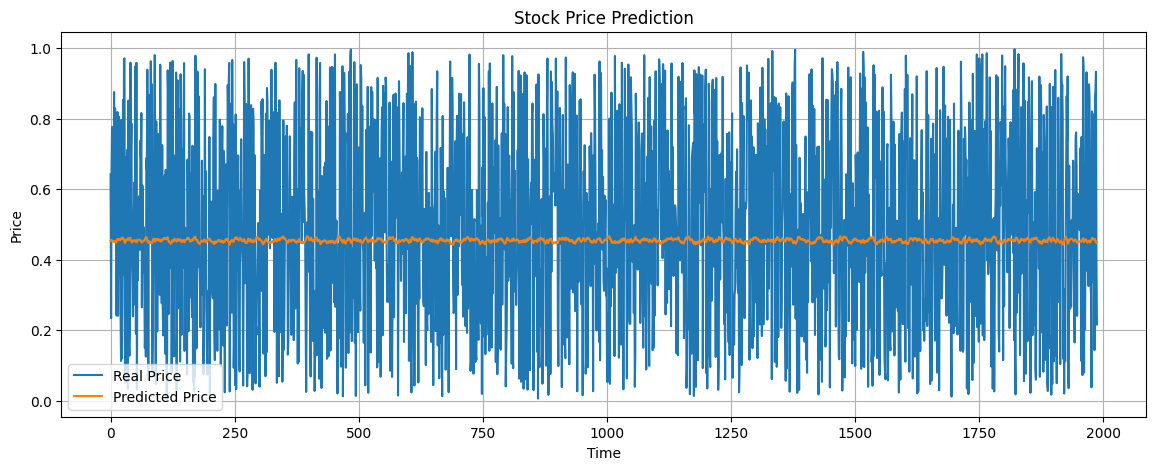

In [11]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(real_prices, label='Real Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import pandas as pd

# Create a DataFrame with real and predicted values
results_df = pd.DataFrame({
    'Real_Price': real_prices.flatten(),
    'Predicted_Price': predicted_prices.flatten()
})

# Save to CSV
results_df.to_csv('predicted_stock_prices.csv', index=False)

# Display the first few rows
results_df.head()


,Real_Price,Predicted_Price
0,0.642384,0.454012
1,0.233832,0.452557
2,0.666849,0.455726
3,0.776347,0.453817
4,0.475085,0.451318


In [13]:
from google.colab import files
files.download('predicted_stock_prices.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('stock_data.csv')
df.head()


Saving stock_data.csv to stock_data (2).csv


,Open,Close,High,Low,Volume,RSI,MACD,Bollinger_Upper,Bollinger_Lower,Sentiment_Score,GDP_Growth,Inflation_Rate,Target
0,0.374639,0.374780,0.373510,0.378390,0.298909,0.847286,0.741715,0.367146,0.366420,0.877177,0.580868,0.038604,0
1,0.950982,0.937746,0.938422,0.946158,0.094805,0.494543,0.881343,0.938396,0.935640,0.907192,0.527044,0.108908,0
2,0.732198,0.719825,0.723644,0.723158,0.126348,0.195471,0.463179,0.710666,0.702300,0.378363,0.351052,0.432540,0
3,0.598823,0.599865,0.596973,0.605322,0.180662,0.736684,0.289076,0.593793,0.586936,0.231614,0.493274,0.946349,0
4,0.156053,0.163410,0.155891,0.166084,0.203646,0.418698,0.318761,0.164158,0.156355,0.191642,0.365116,0.074867,0


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Close', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Low', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Target']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Target')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Target']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Target')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Target']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Target')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Target']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Target')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
# Check for nulls
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)


Open               0
Close              0
High               0
Low                0
Volume             0
RSI                0
MACD               0
Bollinger_Upper    0
Bollinger_Lower    0
Sentiment_Score    0
GDP_Growth         0
Inflation_Rate     0
Target             0
dtype: int64


In [16]:
# Optional: parse and sort by date
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.sort_values('Date')
# df.reset_index(drop=True, inplace=True)


In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use the 'Close' price only
data = df['Close'].values.reshape(-1, 1)

# Scale the data to 0-1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for time series prediction
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Split into train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [19]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('stock_data.csv')
df.head()


Saving stock_data.csv to stock_data (3).csv


,Open,Close,High,Low,Volume,RSI,MACD,Bollinger_Upper,Bollinger_Lower,Sentiment_Score,GDP_Growth,Inflation_Rate,Target
0,0.374639,0.374780,0.373510,0.378390,0.298909,0.847286,0.741715,0.367146,0.366420,0.877177,0.580868,0.038604,0
1,0.950982,0.937746,0.938422,0.946158,0.094805,0.494543,0.881343,0.938396,0.935640,0.907192,0.527044,0.108908,0
2,0.732198,0.719825,0.723644,0.723158,0.126348,0.195471,0.463179,0.710666,0.702300,0.378363,0.351052,0.432540,0
3,0.598823,0.599865,0.596973,0.605322,0.180662,0.736684,0.289076,0.593793,0.586936,0.231614,0.493274,0.946349,0
4,0.156053,0.163410,0.155891,0.166084,0.203646,0.418698,0.318761,0.164158,0.156355,0.191642,0.365116,0.074867,0


In [20]:
# Check for null values
df.isnull().sum()

# Drop rows with any missing data
df.dropna(inplace=True)


In [21]:
# Feature columns (excluding 'Target' if you're predicting actual price)
feature_cols = [
    'Open', 'High', 'Low', 'Volume',
    'RSI', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower',
    'Sentiment_Score', 'GDP_Growth', 'Inflation_Rate'
]

target_col = 'Close'

# Extract inputs and output
features = df[feature_cols].values
target = df[target_col].values.reshape(-1, 1)


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Scale features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target)


In [25]:
def create_multifeature_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(seq_length, len(X)):
        X_seq.append(X[i - seq_length:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

seq_len = 60
X, y = create_multifeature_sequences(scaled_features, scaled_target, seq_len)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [27]:
predictions = model.predict(X_test)

# Inverse scale the predictions and actuals
predicted_prices = target_scaler.inverse_transform(predictions)
real_prices = target_scaler.inverse_transform(y_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


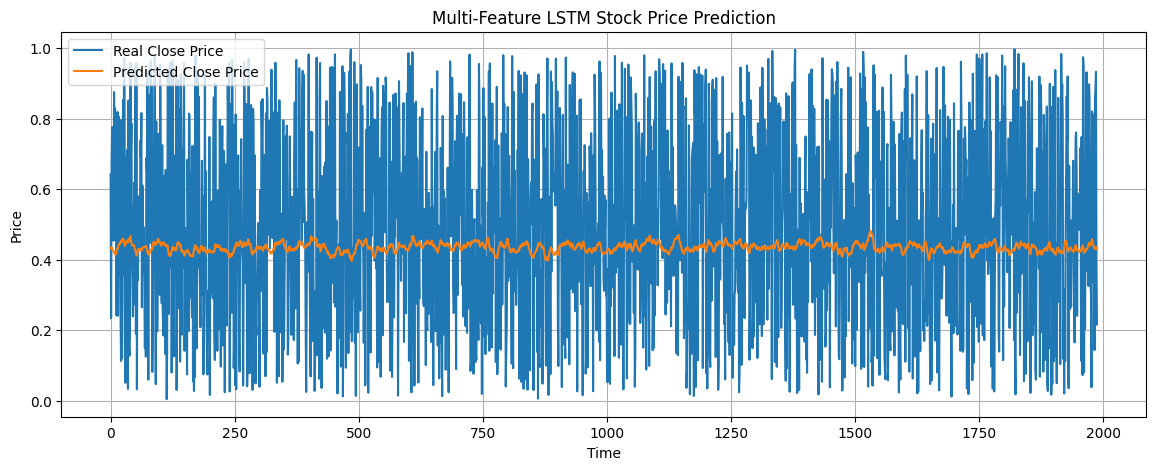

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(real_prices, label='Real Close Price')
plt.plot(predicted_prices, label='Predicted Close Price')
plt.title('Multi-Feature LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
from sklearn.preprocessing import MinMaxScaler

# Scale features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target)


In [30]:
from sklearn.preprocessing import StandardScaler

# Standardize features and target
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

standardized_features = feature_scaler.fit_transform(features)
standardized_target = target_scaler.fit_transform(target)


In [31]:
from sklearn.preprocessing import MinMaxScaler


In [32]:
from sklearn.preprocessing import StandardScaler


In [34]:
!pip install gradio pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.2 MB/s eta 0:00:00


In [44]:
import gradio as gr
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load and preprocess data
def load_data():
    df = pd.read_csv("stock_data.csv")
    X = df.drop("Target", axis=1)
    y = df["Target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model, X.columns.tolist()

model, feature_names = load_data()

# Prediction function
def predict_stock(*input_features):
    input_data = pd.DataFrame([input_features], columns=feature_names)
    prediction = model.predict(input_data)[0]
    return "Buy (1)" if prediction == 1 else "Hold/Sell (0)"

# Gradio Interface
inputs = []
for feature in feature_names:
    inputs.append(gr.Number(label=feature, value=0.0))

interface = gr.Interface(
    fn=predict_stock,
    inputs=inputs,
    outputs="text",
    title="Stock Market Prediction",
    description="Predict whether to Buy (1) or Hold/Sell (0) based on stock indicators.",
    live=False,  # Set to True for real-time updates
)

# Launch the app
if __name__ == "__main__":
    interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7d28ec7d1ccd22ae10.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
